In [81]:
%matplotlib inline
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2
import nibabel as nib

In [104]:
def array_to_plot(points, token, resolution, outfile_name=""):
    """Generates the plotly from the csv file."""
    # Type in the path to your csv file here
    
    thedata = points
#     print(thedata)

    # Set tupleResolution to resolution input parameter
    tupleResolution = resolution;

    # EG: for Aut1367, the spacing is (0.01872, 0.01872, 0.005).
    xResolution = tupleResolution[0]
    yResolution = tupleResolution[1]
    zResolution = tupleResolution[2]
    # Now, to get the mm image size, we can multiply all x, y, z
    # to get the proper mm size when plotting.
    
#     print('asdf')
#     x = [x * xResolution for x in thedata[:, 0]]
#     print(x)

    trace1 = graphobjs.Scatter3d(
        x = [x * xResolution for x in thedata[:, 0]],
        y = [x * yResolution for x in thedata[:, 1]],
        z = [x * zResolution for x in thedata[:, 2]],
        mode='markers',
        marker=dict(
            size=1.2,
            color='cyan',                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.15
        )
    )

    data = [trace1]
    layout = graphobjs.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)'
    )

    fig = graphobjs.Figure(data=data, layout=layout)
#     print(self._token + "plotly")

    make_sure_path_exists('plots')
    
    if outfile_name == "":
        plotly.offline.plot(fig, filename= 'plots/' + token + "_plot.html")
    else:
        plotly.offline.plot(fig, filename= 'plots/' + outfile_name + "_plot.html")

In [105]:
import os
import errno

def make_sure_path_exists(path):
    """Check if the directory a file is going to be written to exists, and if not, create the directory."""
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

## Mean shift clustering function

In [106]:
# seeds: set of seeds (described in Section 2.2.4)
# points: set of voxels whose intensity exceeds the background threshold
# radius: is the radius used for the kernel
# bandwidth: is a value that allows us to change the convergence threshold
def cluster(seeds, points, radius, bandwidth = 1):
    Z = 0
    for point in points:
        Z += point[3]

    C_set = set()
    
    
    
    num_seeds = len(seeds)
    seed_iter = 0
    for seed in seeds: 
        converged = False

        while not converged:
            prev_seed = seed
            new_seed = np.zeros(len(seed))
            for point in points:
                new_seed += (point[3] * point * spherical_kernel(prev_seed - point, radius)) / Z
            converged = check_converged(new_seed, prev_seed, bandwidth)
        C_set.add(new_seed)
    return C_set


    # for p in seeds:
    #     c = p
    #     converged = False
    #     # not sure if implemented correctly?
    #     while not converged:
    #         prev = c
    #         c = np.zeros(len(c))
    #         for q in points:
    #             c += (intensities[q] * q * spherical_kernel(prev - q, radius)) / Z
    #         converged = check_converged(c, prev, bandwidth)
    #     C_set.add(c)
    # return C_set


# used to see if a voxel has converged yet
# voxel_1 is the voxel after the most recent update
# voxel_2 is the voxel prior to the most recent update
# bandwidth allows us to change how we want our data to converge
def check_converged(voxel_1, voxel_2, bandwidth):
    dist = np.linalg.norm(voxel_1 - voxel_2)
    if abs(dist) < .001 * bandwidth:    
        return True
    return False                        


# a is the voxel
# R is a parameter that should be smaller than the expected radius of a cell
def spherical_kernel(a, R):
    if np.linalg.norm(a) < R:
        return 1
    return 0

## File path checking function

In [107]:
import os
import errno

def make_sure_path_exists(path):
    """Check if the directory a file is going to be written to exists, and if not, create the directory."""
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

## loading csv function

In [137]:
def load_csv(path):
    """Method for getting a numpy array from the csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [int(line[0]), int(line[1]), int(line[2]), int(line[3])]
            points.append(entry)
    points = np.array(points)
    return points

## generating plotly function

In [109]:
import plotly
import plotly.graph_objs as graphobjs

def csv_to_plot(file_path, token, resolution, outfile_name=""):
    """Generates the plotly from the csv file."""
    # Type in the path to your csv file here
    thedata = None
    thedata = np.genfromtxt(file_path, delimiter=',', dtype='int', usecols = (0,1,2), names=['a','b','c'])
    print(thedata)

    # Set tupleResolution to resolution input parameter
    tupleResolution = resolution;

    # EG: for Aut1367, the spacing is (0.01872, 0.01872, 0.005).
    xResolution = tupleResolution[0]
    yResolution = tupleResolution[1]
    zResolution = tupleResolution[2]
    # Now, to get the mm image size, we can multiply all x, y, z
    # to get the proper mm size when plotting.
    
    x = [x for x in thedata['a']]
    print('x:')
    print(x)

    trace1 = graphobjs.Scatter3d(
        x = [x * xResolution for x in thedata['a']],
        y = [x * yResolution for x in thedata['b']],
        z = [x * zResolution for x in thedata['c']],
        mode='markers',
        marker=dict(
            size=1.2,
            color='cyan',                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.15
        )
    )

    data = [trace1]
    layout = graphobjs.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)'
    )

    fig = graphobjs.Figure(data=data, layout=layout)
#     print(self._token + "plotly")

    make_sure_path_exists('plots')
    
    if outfile_name == "":
        plotly.offline.plot(fig, filename= 'plots/' + token + "_plot.html")
    else:
        plotly.offline.plot(fig, filename= 'plots/' + outfile_name + "_plot.html")

## Getting initial points

In [110]:
inToken = 'Fear199'

csv_file_path = 'points/' + inToken + '.csv'

points = loadCsv(csv_file_path)

print('shape:')
print(points.shape)
print(points)

shape:
(7467, 4)
[[  0   6 309 252]
 [  0  16 460 219]
 [  0 110 184 234]
 ..., 
 [382 118 368 249]
 [382 179 414 240]
 [382 216 505 249]]


## perform local histogram equilization and Get Seeds

In [12]:
# seeds = points[points[:, 3] > 250]

# print('seeds shape:')
# print(seeds.shape)

# print('seeds:')
# print(seeds)

seeds shape:
(2043, 4)
seeds:
[[  0  29 296 252]
 [  0  91  65 255]
 [  1  44 337 255]
 ..., 
 [382 211 499 252]
 [382 226 318 252]
 [382 262 144 252]]


In [220]:
path = "img/Fear199.nii"

im = nib.load(path)

im2 = nib.load(path)

im = im.get_data()
img = im[:,:,:]

img = np.int16(255 * (np.float32(img) / np.float32(np.max(img))))

shape = im.shape
#affine = im.get_affine()

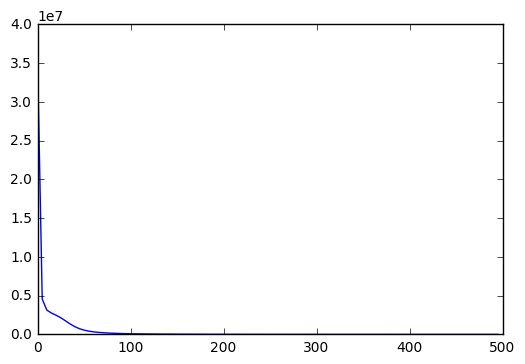

In [221]:
(values, bins) = np.histogram(im, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [222]:
x_value = shape[0]
y_value = shape[1]
z_value = shape[2]

flat = img.flatten()

imgflat = img.reshape(-1)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

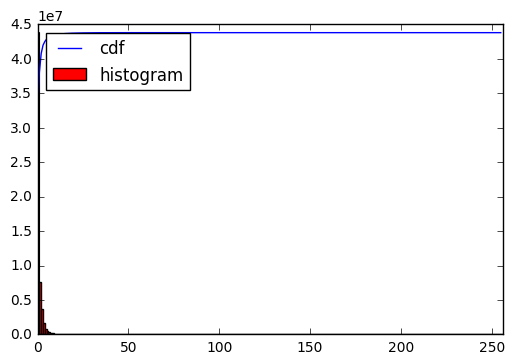

In [223]:
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('wiki.jpg',0)

hist,bins = np.histogram(flat,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(flat,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [224]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [225]:
# img2 = np.int16(255 * (np.float32(img) / np.float32(np.max(img))))

In [226]:
print(np.max(img))

255


In [227]:
img_histeq = cdf[img]

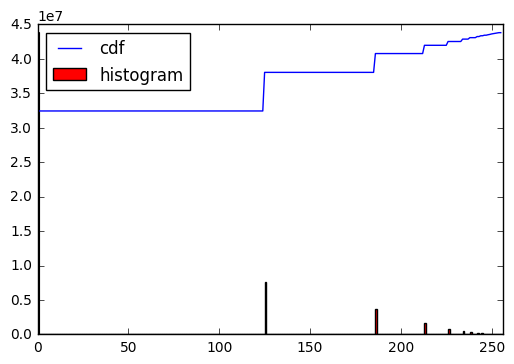

In [228]:
imgflat2 = img_histeq.flatten()

hist,bins = np.histogram(imgflat2,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(imgflat2,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


# Start Skip

In [173]:
np.set_printoptions(threshold=100)
print(imgflat)

[0 0 0 ..., 0 0 0]


In [174]:
img_grey = np.array(imgflat * 255, dtype = np.uint8)

In [175]:
print(img_grey)

[0 0 0 ..., 0 0 0]


In [176]:
temp = clahe.apply(img_grey)

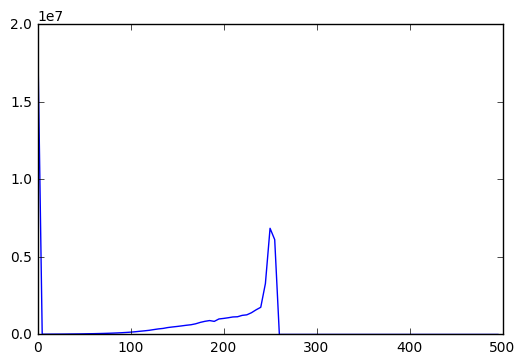

In [177]:
(values, bins) = np.histogram(temp, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [178]:
temp1 = np.array(temp / 255, dtype = np.uint8)

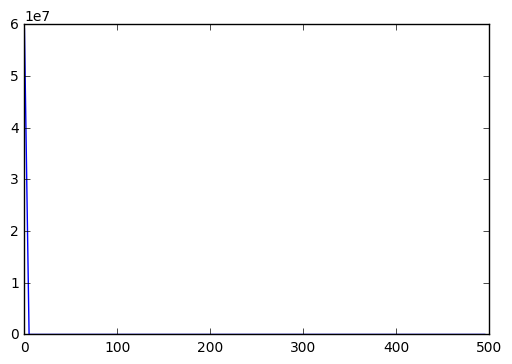

In [179]:
(values, bins) = np.histogram(temp1, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [157]:
temp2 = clahe.apply(imgflat)

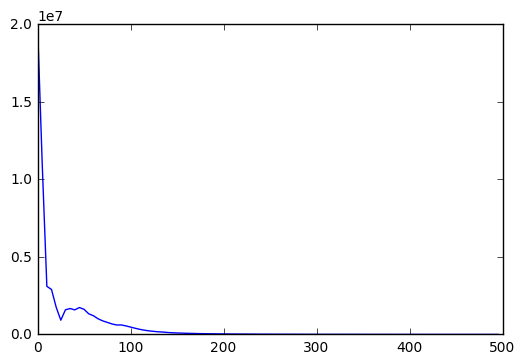

In [158]:
(values, bins) = np.histogram(temp2, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [159]:
# localimgflat = cl1 #cl1.reshape(-1)

lhe_img_data = temp.reshape(x_value, y_value, z_value)

lhe_img_data2 = temp2.reshape(x_value, y_value, z_value)

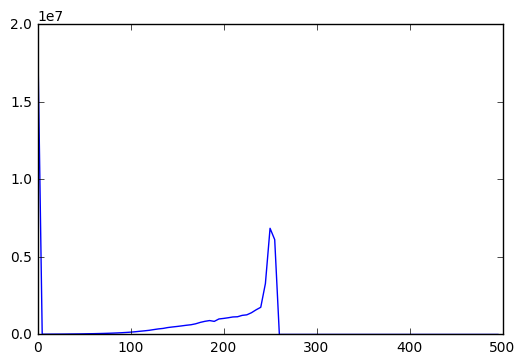

In [118]:
(values, bins) = np.histogram(lhe_img_data, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

# End Skip

In [229]:
num_points = 7500

## Sanity check for shape
# temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = img_histeq
# temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.01
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

shape:
(405, 272, 537)
<type 'numpy.ndarray'>
max:
255


In [230]:
data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

print('total points: %d' % total_points)

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))

total points: 15348900
v.shape:
(15348900,)
x.size before filter: 15348900
y.size before filter: 15348900
z.size before filter: 15348900
v.size before filter: 15348900
x.size after filter: 7561
y.size after filter: 7561
z.size after filter: 7561
v.size after filter: 7561
Num Points: 7561


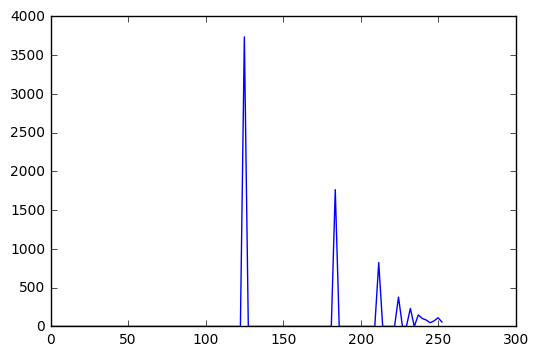

In [231]:
(values, bins) = np.histogram(temp_points[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [248]:
path = 'points/Fear199_histeq_full.csv'

dir_name = 'points'
make_sure_path_exists(dir_name)
np.savetxt(path, temp_points, fmt='%d', delimiter=',')

In [232]:
resolution = (0.01872, 0.01872, 0.005)

In [233]:
array_to_plot(temp_points, "Fear199", resolution, outfile_name="Fear199_histeq_full")

In [246]:
seeds = temp_points[temp_points[:, 3] < 150]

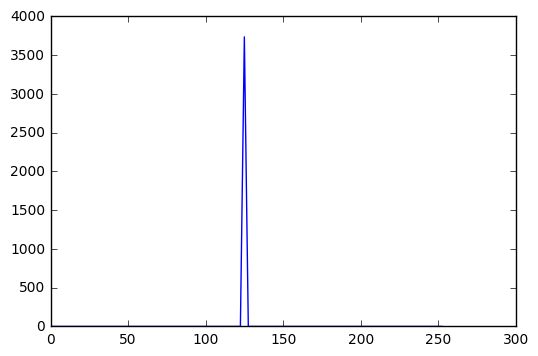

In [247]:
(values, bins) = np.histogram(seeds[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [249]:
path = 'points/Fear199_histeq_low.csv'

dir_name = 'points'
make_sure_path_exists(dir_name)
np.savetxt(path, seeds, fmt='%d', delimiter=',')

In [239]:
print(seeds.shape)
print(seeds)

(3736, 4)
[[ 26 198 149 125]
 [ 36 155 324 125]
 [ 37 166 339 125]
 ..., 
 [393  89 352 125]
 [394  94 326 125]
 [404  98 513 125]]


In [240]:
array_to_plot(seeds, "Fear199", resolution, outfile_name="Fear199_histeq_low")

In [250]:
seeds2 = temp_points[temp_points[:, 3] > 150]

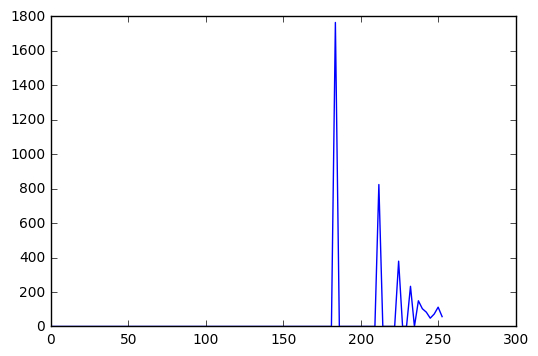

In [251]:
(values, bins) = np.histogram(seeds2[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [252]:
path = 'points/Fear199_histeq_high.csv'

dir_name = 'points'
make_sure_path_exists(dir_name)
np.savetxt(path, seeds2, fmt='%d', delimiter=',')

In [243]:
print(seeds2.shape)
print(seeds2)

(3825, 4)
[[ 52 163 229 186]
 [ 54 149 223 186]
 [ 55 148 229 186]
 ..., 
 [385 138 245 186]
 [386 115 253 186]
 [387 110 311 213]]


In [244]:
array_to_plot(seeds2, "Fear199", resolution, outfile_name="Fear199_histeq_high")

## Performing Mean Shift Clustering

In [15]:
# inImg = imgDownload(inToken, resolution=5)    # store downsampled level 5 brain to memory

In [16]:
# resolution = inImg.GetSpacing();

In [126]:
points = temp_points

In [127]:
print(points.shape)

(9945, 4)


In [133]:
path = 'points/Fear199_points.csv'

dir_name = 'points'
make_sure_path_exists(dir_name)
np.savetxt(path, points, fmt='%d', delimiter=',')

In [134]:
path = 'points/Fear199_seeds.csv'

dir_name = 'points'
make_sure_path_exists(dir_name)
np.savetxt(path, seeds, fmt='%d', delimiter=',')

In [141]:
pts = load_csv('points/Fear199_points.csv')
sds = load_csv('points/Fear199_seeds.csv')

In [147]:
array_to_plot(pts, "Fear199", resolution, outfile_name="Fear199_all_points")

In [142]:
print(pts.shape)
print(sds.shape)

(9945, 4)
(1021, 4)


In [146]:
print(pts)

[[  0  32 324 255]
 [  0  46 456 200]
 [  0 176 266 249]
 ..., 
 [382 230 528 255]
 [382 250 173 252]
 [382 258 267 252]]


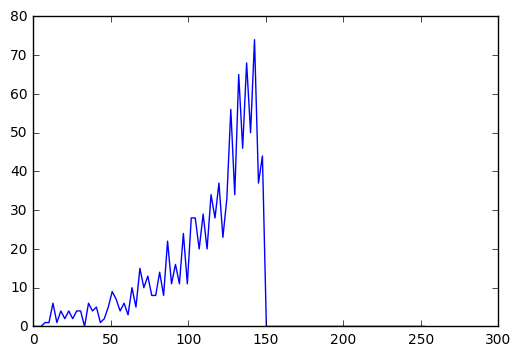

In [143]:
(values, bins) = np.histogram(sds[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [33]:
clustered_points = cluster(seeds, points, radius=20, bandwidth = 1)

KeyboardInterrupt: 

In [129]:
seed = seeds[0]
point = points[0]

In [130]:
dist = np.linalg.norm(seed - point)

In [131]:
print(dist)

197.408206516


## lhe_img_data2

In [160]:
num_points = 10000

## Sanity check for shape
# temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = lhe_img_data2
# temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

shape:
(405, 272, 537)
<type 'numpy.ndarray'>
max:
3970


In [161]:
data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

print('total points: %d' % total_points)

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))

total points: 3600609
v.shape:
(3600609,)
x.size before filter: 3600609
y.size before filter: 3600609
z.size before filter: 3600609
v.size before filter: 3600609
x.size after filter: 9934
y.size after filter: 9934
z.size after filter: 9934
v.size after filter: 9934
Num Points: 9934


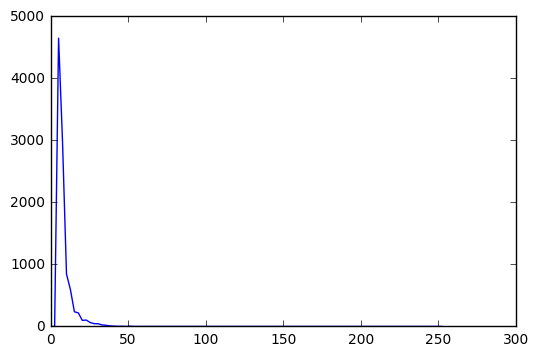

In [162]:
(values, bins) = np.histogram(temp_points[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [163]:
resolution = (0.01872, 0.01872, 0.005)

In [165]:
# seeds = temp_points[temp_points[:, 3] < 150]
seeds = temp_points

In [166]:
print(seeds.shape)
print(seeds)

(9934, 4)
[[  0 142 525   7]
 [ 20 159 265   7]
 [ 21 123 307   6]
 ..., 
 [344 147 326   6]
 [345 128 319   6]
 [346 141 324   6]]


In [169]:
array_to_plot(seeds, "Fear199", resolution, outfile_name="Fear199_lhe2")

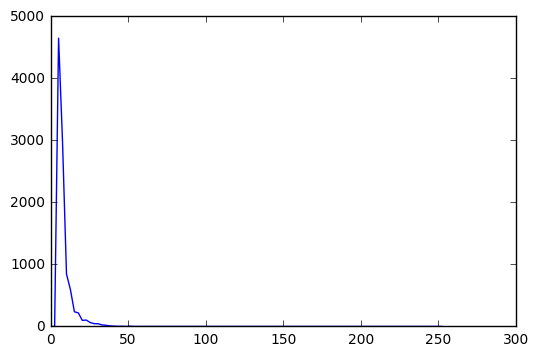

In [168]:
(values, bins) = np.histogram(seeds[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

## Plotting original points

In [47]:
token = 'Fear199'
file_path = 'points/' + token + ".csv"
print(resolution)
csv_to_plot(file_path, token, resolution, "Fear199_og")

(0.01872, 0.01872, 0.005)
[(0, 6, 309) (0, 16, 460) (0, 110, 184) ..., (382, 118, 368)
 (382, 179, 414) (382, 216, 505)]
x:
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,

In [46]:
token = 'Fear199'
file_path = 'points/' + token + ".csv"
print(resolution)
array_to_plot(file_path, token, resolution, "Fear199_og")

(0.01872, 0.01872, 0.005)


TypeError: string indices must be integers, not str

In [6]:
import numpy as np

x = [0, 0, 0]
y = [1, 1, 1]

xnp = np.array(x)
ynp = np.array(y)

arr = np.vstack((xnp, ynp))

print(arr)

print(arr[0])

for row in arr:
    print(row)

[[0 0 0]
 [1 1 1]]
[0 0 0]
[0 0 0]
[1 1 1]
